In [1]:
#Średnia sprzedaż dzienna na podstawie rocznej

sprzedaż = 120e6
sprzedaż_dzienna = sprzedaż / 365



In [2]:
#wyznaczamy control pointy na podstawie tego, że niektóre miesiące mają większą sprzedaż
p1 = sprzedaż_dzienna
p2 = sprzedaż_dzienna + sprzedaż_dzienna * 0.3
p3 = sprzedaż_dzienna - sprzedaż_dzienna * 0.5
p4 = sprzedaż_dzienna + sprzedaż_dzienna * 0.15
p5 = sprzedaż_dzienna + sprzedaż_dzienna * 0.35
p6 = sprzedaż_dzienna - sprzedaż_dzienna * 0.1
p7 = sprzedaż_dzienna

In [3]:
#Tworzymy control pointy pierwszy element krotki to dzien roku a druga to wartosc control pointu

import matplotlib.pyplot as plt
arr = [(0,p1),(90,p2),(95,p3),(181,p4),(358,p5),(362,p6),(365,p7)]
x = [i for i in range(len(arr))]


In [4]:

#Tutaj jakaś nuda skopiowany kod do bezier curve i troche zmodyfikoany


newton_cache = {} # pamięć podręczna dla wyników funkcji newton
def Newton(n,k):
     '''Funkcja oblicza wartość symbolu Newtona'''
     global newton_cache
     if (n,k) not in newton_cache:
         # licznik = n*(n-1)*...*(n-k+1)
         licznik = 1
         for i in range(n-k+1, n+1):
             licznik *= i

         # mianownik = k!
         mianownik = 1
         for i in range(1, k+1):
             mianownik *= i

         newton_cache[(n,k)] = licznik/mianownik

     return newton_cache[(n,k)]

def B(n,i,t):
     '''
     Funkcja oblicza wartość wielomianu bazowego Bernsteina dla
     zadanego parametru t.
     '''
     return Newton(n,i) * (t**i) * (1.0-t)**(n-i)



def Bezier2D(punkty_kontrolne, k):
     '''
     Funkcja przybliża dwuwymiarową krzywą Beziera za pomocą łamanej
     złożonej z k segmentów. Zwraca listę wierzchołków łamanej.

     punkty_kontrolne - lista punktów kontrolnych: [(x0,y0), ..., (xn,yn)]
     k                - ilość segmentów
     '''

     n  = len(punkty_kontrolne)-1 # stopień krzywej Beziera

     # funkcja obliczająca współrzędne (x,y) punktu krzywej dla zadanego t
     def p(t):

         x = 0.0
         y = 0.0
         for i in range(n+1):
             x += punkty_kontrolne[i][0]*B(n,i,t)
             y += punkty_kontrolne[i][1]*B(n,i,t)
         return (x,y)

     dt = 1.0/k # krok parametru t
     return [p(i*dt) for i in range(k+1)]

In [5]:
values = Bezier2D(arr,364)

In [6]:
len(values)

365

In [7]:
values[0]

(0.0, 328767.12328767125)

[0.0, 1.4739622570007958, 2.929089813969132, 4.365790889307078, 5.784470476326894, 7.185530330596213, 8.569368957539485, 9.936381600295803, 11.286960227832928, 12.621493523317708, 13.940366872742754, 15.243962353809435, 16.532658725067158, 17.806831415308995, 19.06685251322354, 20.313090757303176, 21.545911526008492, 22.76567682818919, 23.972745293761175, 25.167472164639904, 26.350209285930212, 27.521305097372235, 28.681104625043844, 29.829949473319196, 30.96817781708369, 32.09612439420524, 33.214120498261785, 34.32249397152514, 35.42156919820115, 36.51166709792612, 37.59310511951965, 38.66619723499362, 39.73125393381753, 40.788582217440286, 41.838485594068025, 42.881264073698524, 43.91721416341169, 44.94662886291645, 45.96979766035397, 46.98700652835712, 47.998537920366324, 49.00467076720152, 50.00568047389071, 51.00183891675457, 51.99341444074748, 52.980671857054844, 53.96387244094668, 54.94327392988756, 55.919130521902815, 56.89169287420111, 57.861208102053155, 58.827919777926944, 5

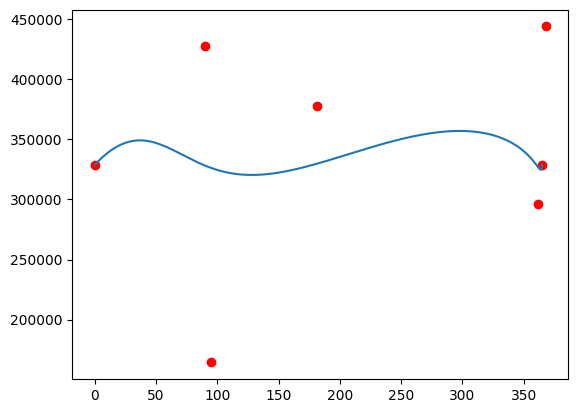

In [8]:
#wizualizacja tego co wygenerowalismy

import numpy as np
x_ax = []
y_ax = []
for x,y in values:
  x_ax.append(x)
  y_ax.append(y)

print(x_ax)
plt.plot(x_ax , y_ax)
plt.scatter([0,90,95,181,368,362,365] , [p1,p2,p3,p4,p5,p6,p7] , color = 'red')

In [9]:
len(y_ax)

365

In [10]:
#Generowanie zaszumienia dla każdej wartości


from random import randint , uniform

answer = {}
x = 1
h = 0
for y in y_ax:
    randos = randint(1 ,2)

    if randos == 1:
        answer[x] = y - sprzedaż_dzienna * uniform(0, 0.01)
    else:
        answer[x] = y + sprzedaż_dzienna * uniform(0,0.01)
    x += 1

for y in y_ax:
    randos = randint(1 ,2)

    if randos == 1:
        answer[x] = y - sprzedaż_dzienna * uniform(0, 0.01)
    else:
        answer[x] = y + sprzedaż_dzienna * uniform(0,0.01)
    x += 1

In [11]:
print(answer.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

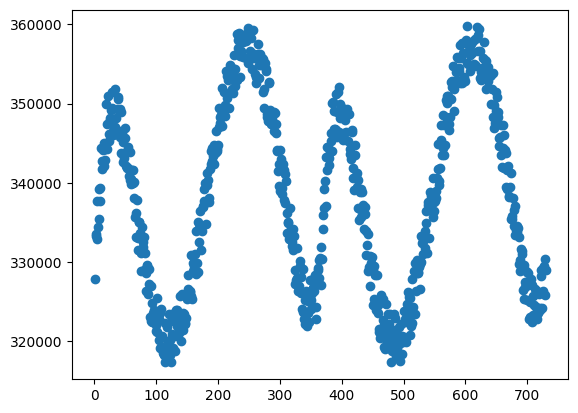

In [12]:


#wizualizacja naszego projektu

plt.scatter(answer.keys() , answer.values())

In [13]:
import pandas as pd

data_frame = pd.DataFrame(answer.keys() , answer.values())
data_frame.to_csv('/content/data_set.csv')

In [14]:

#Testiwabue modeli , dwa pierwwwsze nie działały możesz skipnąć

from sklearn.linear_model import BayesianRidge
import numpy as np

n_order = 2

x_train = list(answer.keys())
y_train = list(answer.values())
X_train = np.vander(x_train, n_order + 1, increasing=True)
reg = BayesianRidge(tol=1e-3, fit_intercept=False, compute_score=True)

In [15]:

x_train = np.array(x_train).reshape(-1, 1)
reg.fit(x_train, y_train)

BayesianRidge(compute_score=True, fit_intercept=False)

In [16]:
keys = answer.keys()
keys_array = np.array(list(keys)).reshape(-1, 1)  # Convert keys to a list and then to a 2D array
prediction = reg.predict(keys_array)


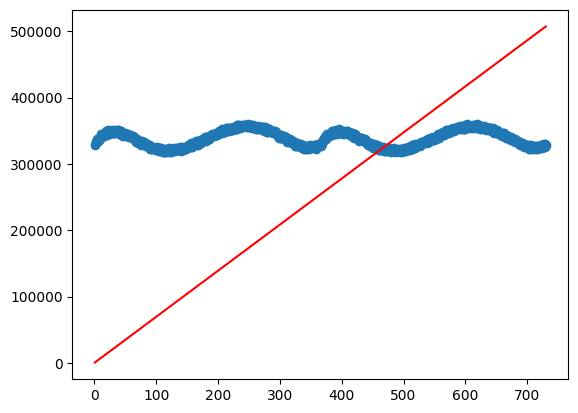

In [17]:
plt.plot(answer.keys() , prediction , color = 'red')


plt.scatter(answer.keys() , answer.values())

In [18]:
import tensorflow as tf
# Set random seed

y_train = np.array(y_train)
tf.random.set_seed(42)

insurance_model_more_layers = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),  # Additional hidden layer
  tf.keras.layers.Dense(25, activation='relu'),  # Additional hidden layer
  tf.keras.layers.Dense(10, activation='relu'),  # Additional hidden layer
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_more_layers.compile(loss=tf.keras.losses.mae,
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=['mae'])

# Fit the model for 200 epochs
history_more_layers = insurance_model_more_layers.fit(x_train, y_train, epochs=200, verbose=0)  # You can adjust the verbosity level

In [19]:
input_data = list(answer.keys())

# Convert the list to a NumPy array
input_array = np.array(input_data)

# Reshape the array if necessary
input_array = input_array.reshape(-1, 1)  # Reshape to a 2D array with one column

# Now you can use the input_array for prediction
predictions = insurance_model_more_layers.predict(input_array)

23/23 [==============================] - 0s 3ms/step


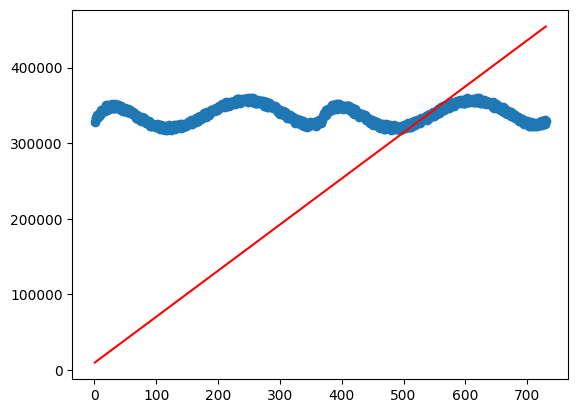

In [20]:
plt.plot(answer.keys() , predictions , color = 'red')


plt.scatter(answer.keys() , answer.values())

In [21]:
import tensorflow as tf
# Set random seed

y_train = np.array(y_train)
tf.random.set_seed(42)


maximum_value_to_normalize = max(y_train)


y_train = y_train/maximum_value_to_normalize


In [27]:
answer.keys() , answer.values()

(dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

In [30]:

#Ten model działa  , poopisuje co tu robimy

value_max = max(answer.values())

In [38]:
#Tworzymy dane przygotowane do nauki oraz normalizujemy wartosci y


y_train = np.array(list(answer.values()))

# Perform the division
y_train = y_train / value_max


x_train = np.array(list(answer.keys()))
x_train = np.reshape(x_train, (x_train.shape[0], -1))

In [42]:
#Tworzenie konkretnego modelu pare warstw Dense , można byłoby użyc Dropout ale cos sie rozwalało. Metryka błedu mean absolute error
#Uczymy przez 2000 epok
import tensorflow as tf
# Set random seed

tf.random.set_seed(42)

insurance_model_more_layers = tf.keras.Sequential([
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(125, activation='relu'),
  tf.keras.layers.Dense(70, activation='relu'),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

insurance_model_more_layers.compile(loss=tf.keras.losses.mae,
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=['mae'])

history_more_layers = insurance_model_more_layers.fit(x_train, y_train, epochs=2000)

Epoch 1/2000
23/23 [==============================] - 2s 3ms/step - loss: 0.9777 - mae: 0.9777
Epoch 2/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.6808 - mae: 0.6808
Epoch 3/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.5205 - mae: 0.5205
Epoch 4/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4058 - mae: 0.4058
Epoch 5/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.4537 - mae: 0.4537
Epoch 6/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.3798 - mae: 0.3798
Epoch 7/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.3545 - mae: 0.3545
Epoch 8/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.3847 - mae: 0.3847
Epoch 9/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.3364 - mae: 0.3364
Epoch 10/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.2633 - mae: 0.2633
Epoch 11/2000
23/23 [============================

In [43]:

#Śmiga fest

x = np.arange(0,1200)
input_array = x.reshape(-1, 1)
predictions = insurance_model_more_layers.predict(input_array%730)

38/38 [==============================] - 0s 3ms/step


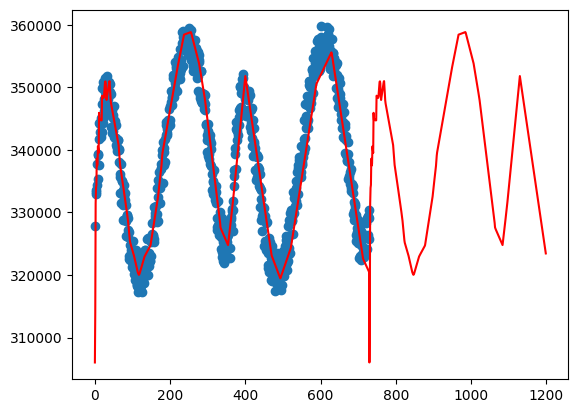

In [44]:
#No i generujemy plota

plt.plot(x ,predictions * value_max , color = 'red')


plt.scatter(list(answer.keys()), np.array(y_train) * value_max)

In [50]:
predictions = predictions[730:] * value_max

In [53]:
map = {"Styczen" : sum(predictions[:31]),
 "Luty" : sum(predictions[31:59]),
 "Marzec" : sum(predictions[59:89])}

In [59]:
map

{'Styczen': array([10604378.], dtype=float32),
 'Luty': array([9712031.], dtype=float32),
 'Marzec': array([10055337.], dtype=float32)}

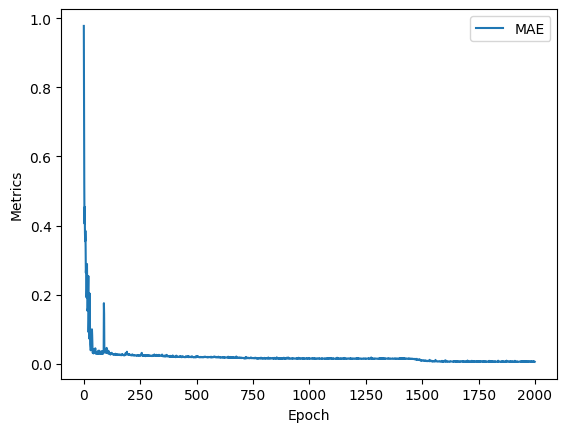

In [60]:
#I tutaj mamy ploat mea w zaleznosci od epoki

plt.plot(history_more_layers.history['mae'], label='MAE')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()